<a href="https://colab.research.google.com/github/mrunaliyadav003/AI-ML/blob/main/drone_print(sovik_suggestion).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install librosa

In [ ]:
pip install joblib


In [ ]:
#find max peak value and corresponding time
import librosa

# Specify the path and filename of the audio file
audio_file = '/content/drive/MyDrive/paras/Audio/filtered/DRONE_001_filtered.wav'

# Read the audio file
y, sr = librosa.load(audio_file)

# Calculate the absolute value of the audio signal
abs_y = abs(y)

# Apply a moving average filter to smooth the signal (optional)
window_size = 100  # Adjust window size as needed
smoothed_y = librosa.util.normalize(abs_y, norm=1, axis=-1, threshold=None, fill=True)

# Find the index of the maximum peak value
max_index = smoothed_y.argmax()

# Convert the index to time in seconds
max_time = librosa.samples_to_time(max_index, sr=sr)

# Display the maximum peak value and corresponding time
max_value = smoothed_y[max_index]
print('Maximum peak value:', max_value)
print('Corresponding time: {:.2f} seconds'.format(max_time))


Maximum peak value: 4.2425992e-05
Corresponding time: 0.14 seconds


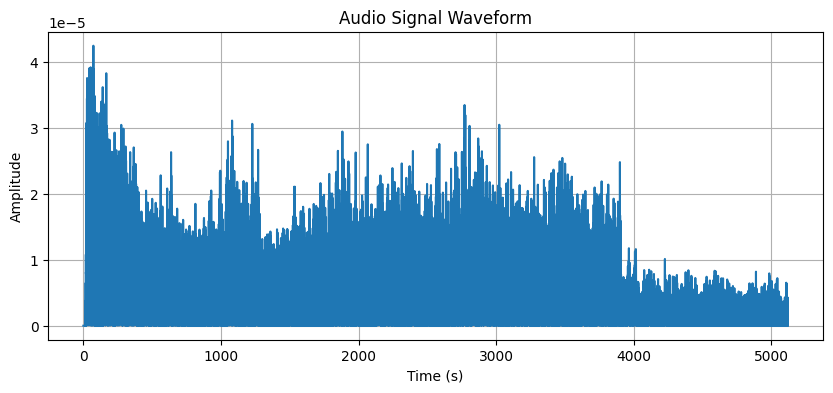

In [ ]:
#audio signal waveform
import librosa
import matplotlib.pyplot as plt

# Specify the path and filename of the audio file
audio_file = '/content/drive/MyDrive/paras/Audio/filtered/DRONE_001_filtered.wav'

# Read the audio file
y, sr = librosa.load(audio_file)

# Calculate the absolute value of the audio signal
abs_y = abs(y)

# Apply a moving average filter to smooth the signal (optional)
window_size = 100  # Adjust window size as needed
smoothed_y = librosa.util.normalize(abs_y, norm=1, axis=-1, threshold=None, fill=True)

# Create a time axis for the waveform
time = librosa.times_like(smoothed_y, sr=sr)

# Plot the waveform
plt.figure(figsize=(10, 4))
plt.plot(time, smoothed_y)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Audio Signal Waveform')
plt.grid(True)
plt.show()


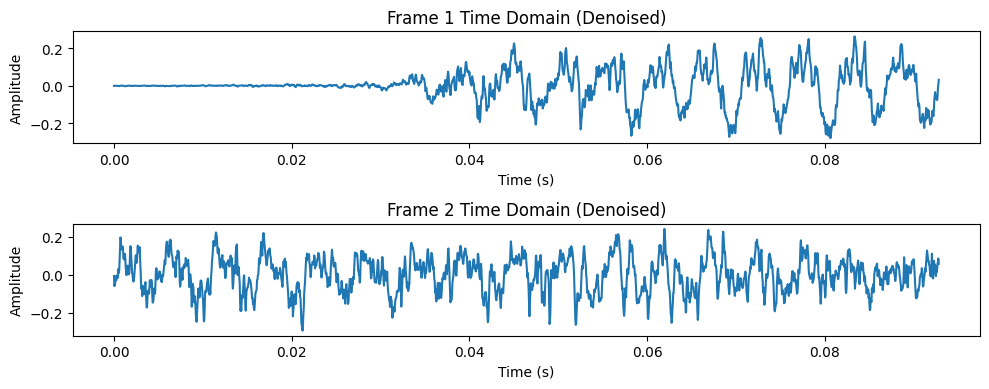

In [ ]:
#check the time domain for default audio using frame 1 and frame 2 with minimal noise in it

import librosa
import numpy as np
import matplotlib.pyplot as plt

# Specify the path and filename of the audio file
audio_file = '/content/DRONE_001.wav'

# Read the audio file
y, sr = librosa.load(audio_file)

# Frame parameters
frame_size = 2048  # Adjust frame size as needed
hop_length = 512   # Adjust hop length as needed

# Extract the samples for frame 1 and frame 2
frame_1_start = 0
frame_1_end = frame_1_start + frame_size
frame_1_samples = y[frame_1_start:frame_1_end]

frame_2_start = frame_1_end
frame_2_end = frame_2_start + frame_size
frame_2_samples = y[frame_2_start:frame_2_end]

# Denoise frame 1
frame_1_denoised = librosa.effects.hpss(frame_1_samples)[0]

# Denoise frame 2
frame_2_denoised = librosa.effects.hpss(frame_2_samples)[0]

# Create time axes for the frames
time_frame_1 = np.arange(len(frame_1_samples)) / sr
time_frame_2 = np.arange(len(frame_2_samples)) / sr

# Plot the waveforms for frame 1 and frame 2
plt.figure(figsize=(10, 4))

plt.subplot(2, 1, 1)
plt.plot(time_frame_1, frame_1_denoised)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Frame 1 Time Domain (Denoised)')

plt.subplot(2, 1, 2)
plt.plot(time_frame_2, frame_2_denoised)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Frame 2 Time Domain (Denoised)')

plt.tight_layout()
plt.show()


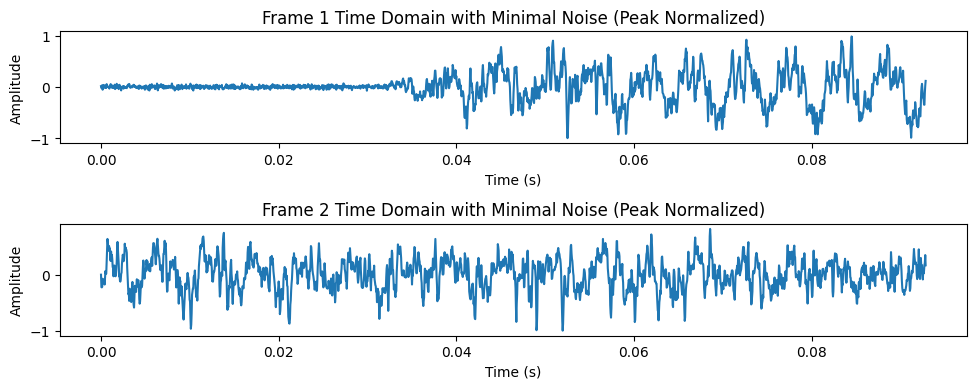

In [ ]:
#To perform peak normalization with minimal noise on frame 1 and frame 2
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Specify the path and filename of the audio file
audio_file = '/content/DRONE_001.wav'

# Read the audio file
y, sr = librosa.load(audio_file)

# Frame parameters
frame_size = 2048  # Adjust frame size as needed
hop_length = 512   # Adjust hop length as needed

# Extract the samples for frame 1 and frame 2
frame_1_start = 0
frame_1_end = frame_1_start + frame_size
frame_1_samples = y[frame_1_start:frame_1_end]

frame_2_start = frame_1_end
frame_2_end = frame_2_start + frame_size
frame_2_samples = y[frame_2_start:frame_2_end]

# Apply minimal noise to frame 1 and frame 2
minimal_noise_level = 0.01  # Adjust the desired noise level
frame_1_noisy = frame_1_samples + minimal_noise_level * np.random.randn(len(frame_1_samples))
frame_2_noisy = frame_2_samples + minimal_noise_level * np.random.randn(len(frame_2_samples))

# Perform peak normalization on frame 1 and frame 2 (including noise)
frame_1_normalized = frame_1_noisy / np.max(np.abs(frame_1_noisy))
frame_2_normalized = frame_2_noisy / np.max(np.abs(frame_2_noisy))

# Create time axes for the frames
time_frame_1 = np.arange(len(frame_1_samples)) / sr
time_frame_2 = np.arange(len(frame_2_samples)) / sr

# Plot the waveforms for frame 1 and frame 2 (including noise)
plt.figure(figsize=(10, 4))

plt.subplot(2, 1, 1)
plt.plot(time_frame_1, frame_1_normalized)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Frame 1 Time Domain with Minimal Noise (Peak Normalized)')

plt.subplot(2, 1, 2)
plt.plot(time_frame_2, frame_2_normalized)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Frame 2 Time Domain with Minimal Noise (Peak Normalized)')

plt.tight_layout()
plt.show()


In [ ]:
!pip install librosa matplotlib


In [ ]:
import numpy as np
import soundfile as sf

def calculate_frame_noise(frame1, frame2):
    diff = np.abs(frame1 - frame2)
    average_diff = np.mean(diff)
    return average_diff

def check_minimal_noise(audio_file, frame_size, frame_shift):
    audio, sample_rate = sf.read(audio_file)

    frame_length = int(frame_size * sample_rate)
    frame_shift_length = int(frame_shift * sample_rate)

    num_frames = (len(audio) - frame_length) // frame_shift_length + 1

    min_noise = float('inf')

    for i in range(num_frames - 1):
        start = i * frame_shift_length
        end = start + frame_length

        frame1 = audio[start:end]
        frame2 = audio[start + frame_shift_length:end + frame_shift_length]

        frame_noise = calculate_frame_noise(frame1, frame2)

        if frame_noise < min_noise:
            min_noise = frame_noise

    return min_noise

# Example usage
audio_file = '/content/DRONE_001.wav'
frame_size = 0.48  # Frame size in seconds
frame_shift = 0.1  # Frame shift in seconds

minimal_noise = check_minimal_noise(audio_file, frame_size, frame_shift)
print("Minimal noise:", minimal_noise)


Minimal noise: 0.020516195895540292


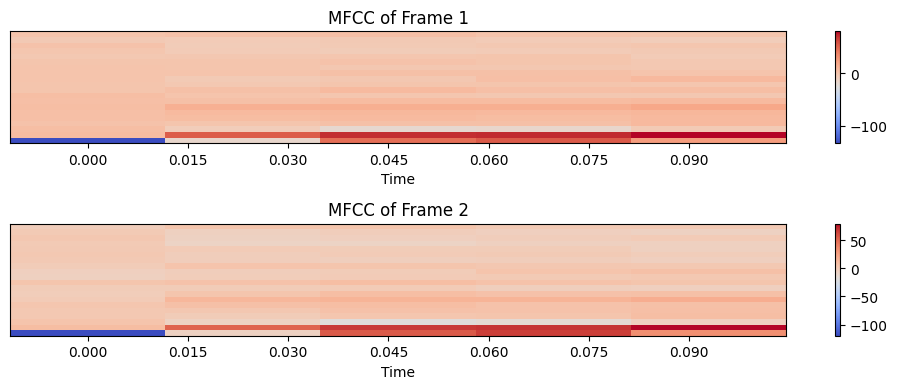

In [ ]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Specify the path and filename of the audio file
audio_file = '/content/DRONE_001.wav'

# Read the audio file
y, sr = librosa.load(audio_file)

# Frame parameters
frame_size = 2048  # Adjust frame size as needed
hop_length = 512   # Adjust hop length as needed

# Extract the samples for frame 1 and frame 2
frame_1_start = 13
frame_1_end = frame_1_start + frame_size
frame_1_samples = y[frame_1_start:frame_1_end]

frame_2_start = 13
frame_2_end = frame_2_start + frame_size
frame_2_samples = y[frame_2_start:frame_2_end]

# Apply minimal noise to frame 1 and frame 2
minimal_noise_level = 0.02  # Adjust the desired noise level
frame_1_noisy = frame_1_samples + minimal_noise_level * np.random.randn(len(frame_1_samples))
frame_2_noisy = frame_2_samples + minimal_noise_level * np.random.randn(len(frame_2_samples))

# Perform peak normalization on frame 1 and frame 2 (including noise)
frame_1_normalized = frame_1_noisy / np.max(np.abs(frame_1_noisy))
frame_2_normalized = frame_2_noisy / np.max(np.abs(frame_2_noisy))

# Compute MFCCs for frame 1 and frame 2
mfcc_frame_1 = librosa.feature.mfcc(y=frame_1_normalized, sr=sr)
mfcc_frame_2 = librosa.feature.mfcc(y=frame_2_normalized, sr=sr)

# Plot the MFCCs for frame 1 and frame 2
plt.figure(figsize=(10, 4))

plt.subplot(2, 1, 1)
librosa.display.specshow(mfcc_frame_1, x_axis='time')
plt.colorbar()
plt.title('MFCC of Frame 1')

plt.subplot(2, 1, 2)
librosa.display.specshow(mfcc_frame_2, x_axis='time')
plt.colorbar()
plt.title('MFCC of Frame 2')

plt.tight_layout()
plt.show()


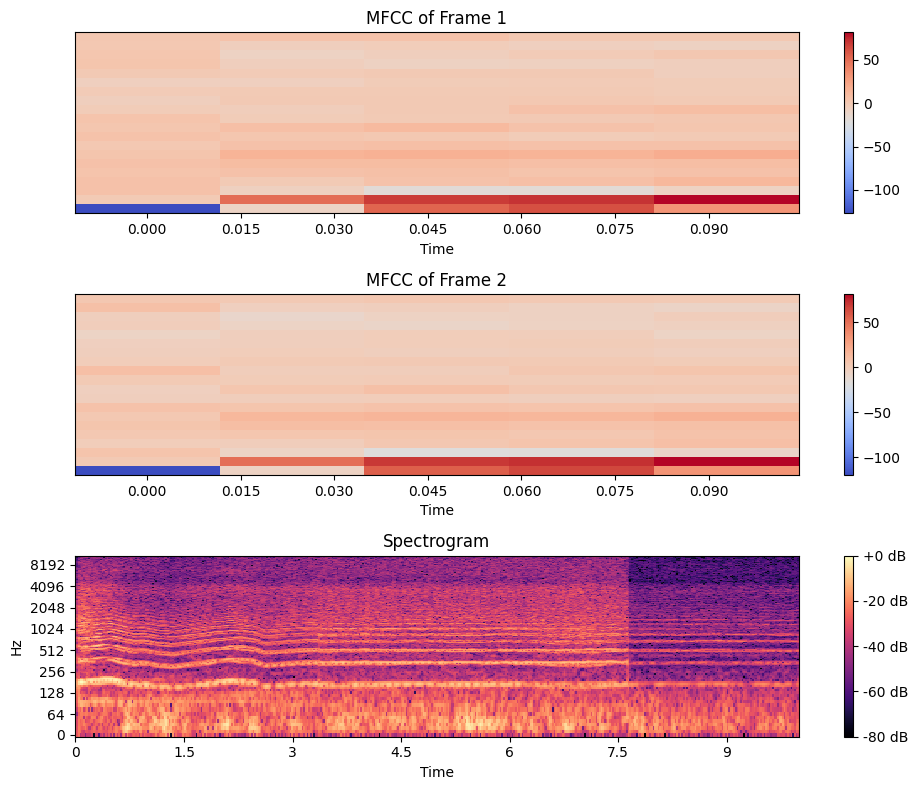

In [ ]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Specify the path and filename of the audio file
audio_file = '/content/DRONE_001.wav'

# Read the audio file
y, sr = librosa.load(audio_file)

# Frame parameters
frame_size = 2048  # Adjust frame size as needed
hop_length = 512   # Adjust hop length as needed

# Extract the samples for frame 1 and frame 2
frame_1_start = 13
frame_1_end = frame_1_start + frame_size
frame_1_samples = y[frame_1_start:frame_1_end]

frame_2_start = 13
frame_2_end = frame_2_start + frame_size
frame_2_samples = y[frame_2_start:frame_2_end]

# Apply minimal noise to frame 1 and frame 2
minimal_noise_level = 0.02  # Adjust the desired noise level
frame_1_noisy = frame_1_samples + minimal_noise_level * np.random.randn(len(frame_1_samples))
frame_2_noisy = frame_2_samples + minimal_noise_level * np.random.randn(len(frame_2_samples))

# Perform peak normalization on frame 1 and frame 2 (including noise)
frame_1_normalized = frame_1_noisy / np.max(np.abs(frame_1_noisy))
frame_2_normalized = frame_2_noisy / np.max(np.abs(frame_2_noisy))

# Compute MFCCs for frame 1 and frame 2
mfcc_frame_1 = librosa.feature.mfcc(y=frame_1_normalized, sr=sr)
mfcc_frame_2 = librosa.feature.mfcc(y=frame_2_normalized, sr=sr)

# Plot the MFCCs for frame 1 and frame 2
plt.figure(figsize=(10, 8))

plt.subplot(3, 1, 1)
librosa.display.specshow(mfcc_frame_1, x_axis='time')
plt.colorbar()
plt.title('MFCC of Frame 1')

plt.subplot(3, 1, 2)
librosa.display.specshow(mfcc_frame_2, x_axis='time')
plt.colorbar()
plt.title('MFCC of Frame 2')

# Compute the spectrogram for the audio file
S = np.abs(librosa.stft(y))

plt.subplot(3, 1, 3)
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), y_axis='log', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import librosa
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Function to extract MFCC features from audio file
def extract_mfcc(audio_file, num_mfcc=13):
    signal, sr = librosa.load(audio_file)  # Load audio file
    mfccs = librosa.feature.mfcc(signal, sr=sr, n_mfcc=num_mfcc)  # Extract MFCC features
    return mfccs.T  # Transpose the matrix for scikit-learn compatibility

In [ ]:
from scipy.io import wavfile

# Define the file paths
audio_file = "/content/DRONE_001.wav"
label_file = "/content/sample_data/drone_labels.npy"
output_file = "/content/sample_data/audio_output.wav"

# Load the WAV file
sample_rate, audio_data = wavfile.read(audio_file)

# Save the audio data as a new WAV file
wavfile.write(output_file, sample_rate, audio_data)

print("Audio data saved as", output_file)


Audio data saved as /content/sample_data/audio_output.wav


In [ ]:
!pip install scipy
!pip install numpy
!pip install librosa

In [ ]:
import numpy as np
import librosa
# Define the file paths
audio_file = "/content/DRONE_001.wav"
label_file = "/content/sample_data/audio_output.wav"

# Load the WAV file
audio_data, sample_rate = librosa.load(audio_file)

# Extract MFCC features
mfcc_features = librosa.feature.mfcc(y=audio_data, sr=sample_rate)
output_file = "/content/sample_data/mfcc_features.npy"

# Save the MFCC features to a file using NumPy
np.save(output_file, mfcc_features)

print("MFCC features saved as", output_file)
# Load the MFCC features from the file
loaded_mfcc_features = np.load(output_file)

# Print the shape of the loaded MFCC features
print("Loaded MFCC features shape:", loaded_mfcc_features.shape)


MFCC features saved as /content/sample_data/mfcc_features.npy
Loaded MFCC features shape: (20, 431)


In [ ]:
import numpy as np
import librosa
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt


In [ ]:
import librosa

audio_data, sample_rate = librosa.load("/content/DRONE_001.wav")

target_sample_rate = 44100  # Replace with your desired sample rate
if sample_rate != target_sample_rate:
    audio_data = librosa.resample(audio_data, sample_rate, target_sample_rate)
    sample_rate = target_sample_rate


TypeError: ignored

In [ ]:
import numpy as np
import librosa

# Load the audio file (replace 'audio_file.wav' with your actual audio file path)
audio_file = "/content/DRONE_001.wav"
audio_data, sample_rate = librosa.load(audio_file)

# Step 1: Data Preprocessing
# Resample the audio to a specific sample rate if necessary
target_sample_rate = 44100  # Replace with your desired sample rate
if sample_rate != target_sample_rate:
    audio_data = librosa.resample(audio_data, target_sample_rate, sample_rate)
    sample_rate = target_sample_rate

# Normalize the audio waveform to a fixed range (-1 to 1)
normalized_audio = librosa.util.normalize(audio_data)

# Remove silence or background noise from the audio
trimmed_audio, _ = librosa.effects.trim(normalized_audio)

# Print the shape of the preprocessed audio data
print("Preprocessed audio data shape:", trimmed_audio.shape)


TypeError: ignored

In [ ]:
!pip install --upgrade torchaudio

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchaudio


In [ ]:
# Define the neural network architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=16, kernel_size=5)
        self.pool1 = nn.MaxPool1d(kernel_size=2)
        self.conv2 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=3)
        self.pool2 = nn.MaxPool1d(kernel_size=2)
        self.fc1 = nn.Linear(in_features=32*39, out_features=128)
        self.fc2 = nn.Linear(in_features=128, out_features=1)

In [ ]:
def forward(self, x):
        x = self.pool1(torch.relu(self.conv1(x)))
        x = self.pool2(torch.relu(self.conv2(x)))
        x = x.view(-1, 32*39)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [ ]:
import os
import torchaudio
# Load the audio file
audio_file_path = '/content/DRONE_001.wav'
waveform, sample_rate = torchaudio.load(audio_file_path)

In [ ]:
# Preprocess the audio waveform
preprocess = nn.Sequential(
    torchaudio.transforms.Resample(orig_freq=sample_rate, new_freq=8000),
    torchaudio.transforms.MelSpectrogram(sample_rate=8000, n_fft=1024, hop_length=512, n_mels=64),
    torchaudio.transforms.FrequencyMasking(freq_mask_param=15),
    torchaudio.transforms.TimeMasking(time_mask_param=35)
)
spectrogram = preprocess(waveform.unsqueeze(0)).squeeze(0)


In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader, random_split

# Create a dataset of spectrograms and corresponding labels
spectrograms = torch.randn(100, 128, 128)
labels = torch.randint(0, 10, (100,))

# Define the sizes for train and test sets
train_size = 80
test_size = 20

# Randomly split the dataset into train and test sets
train_dataset, test_dataset = random_split(
    TensorDataset(spectrograms, labels),
    [train_size, test_size]
)

# Create data loaders for train and test sets
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [ ]:
# Instantiate the neural network and optimizer
net = Net()
optimizer = optim.Adam(net.parameters(), lr=0.01)


In [ ]:
import torch
import torch.nn as nn
torch.manual_seed(123)

# Define the neural network model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(10, 5)
        self.fc2 = nn.Linear(5, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = nn.functional.relu(x)
        x = self.fc2(x)
        return x

# Define the training parameters
num_epochs = 50
batch_size = 10
learning_rate = 0.1

# Create the data loaders (dummy data for demonstration purposes)
train_data = torch.randn(1000, 10)
train_labels = torch.randn(1000, 1)
train_dataset = torch.utils.data.TensorDataset(train_data, train_labels)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size)

test_data = torch.randn(200, 10)
test_labels = torch.randn(200, 1)
test_dataset = torch.utils.data.TensorDataset(test_data, test_labels)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size)

# Initialize the neural network model and optimizer
net = Net()
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)
criterion = nn.MSELoss()

# Train the neural network
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    epoch_loss = running_loss / len(train_loader)
    print('Epoch [%d], Loss: %.4f' % (epoch+1, epoch_loss))

# Evaluate the model on test data
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        inputs, labels = data
        outputs = net(inputs)
        predicted = torch.round(outputs)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print('Accuracy: %.2f %%' % accuracy)

Epoch [1], Loss: 1.0013
Epoch [2], Loss: 0.9846
Epoch [3], Loss: 0.9822
Epoch [4], Loss: 0.9795
Epoch [5], Loss: 0.9785
Epoch [6], Loss: 0.9776
Epoch [7], Loss: 0.9766
Epoch [8], Loss: 0.9760
Epoch [9], Loss: 0.9756
Epoch [10], Loss: 0.9747
Epoch [11], Loss: 0.9746
Epoch [12], Loss: 0.9739
Epoch [13], Loss: 0.9730
Epoch [14], Loss: 0.9732
Epoch [15], Loss: 0.9730
Epoch [16], Loss: 0.9732
Epoch [17], Loss: 0.9728
Epoch [18], Loss: 0.9727
Epoch [19], Loss: 0.9717
Epoch [20], Loss: 0.9718
Epoch [21], Loss: 0.9719
Epoch [22], Loss: 0.9717
Epoch [23], Loss: 0.9716
Epoch [24], Loss: 0.9711
Epoch [25], Loss: 0.9713
Epoch [26], Loss: 0.9717
Epoch [27], Loss: 0.9710
Epoch [28], Loss: 0.9707
Epoch [29], Loss: 0.9706
Epoch [30], Loss: 0.9707
Epoch [31], Loss: 0.9704
Epoch [32], Loss: 0.9710
Epoch [33], Loss: 0.9702
Epoch [34], Loss: 0.9700
Epoch [35], Loss: 0.9695
Epoch [36], Loss: 0.9694
Epoch [37], Loss: 0.9687
Epoch [38], Loss: 0.9686
Epoch [39], Loss: 0.9684
Epoch [40], Loss: 0.9682
Epoch [41

In [ ]:
# Split the data for MFCC feature extraction
train_data_mfcc = train_data[:800]
train_labels_mfcc = train_labels[:800]

test_data_mfcc = test_data[:160]
test_labels_mfcc = test_labels[:160]


In [ ]:
# Split the data for MFCC feature extraction
train_data_mfcc = train_data[:800]
train_labels_mfcc = train_labels[:800]

test_data_mfcc = test_data[:160]
test_labels_mfcc = test_labels[:160]

# Extract MFCC features from audio data

# TODO: Perform MFCC feature extraction using train_data_mfcc and test_data_mfcc

# Import the required libraries for SVM regression
from sklearn import svm
from sklearn.metrics import mean_squared_error

# Create an instance of the SVM regressor
regressor = svm.SVR()

# Train the SVM regressor
regressor.fit(train_data_mfcc, train_labels_mfcc)

# Predict the labels for the test data
predicted_labels = regressor.predict(test_data_mfcc)

# Evaluate the performance of the SVM regressor using mean squared error
mse = mean_squared_error(test_labels_mfcc, predicted_labels)
print('Mean Squared Error: %.2f' % mse)


Mean Squared Error: 1.12


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Sample data
y_true = np.array([[1], [2], [3]])  # Column vector
y_pred = np.array([0.9, 1.8, 3.2])  # 1D array

# Reshape y_true using ravel()
y_true = np.ravel(y_true)

# Calculate Mean Squared Error
mse = mean_squared_error(y_true, y_pred)
print('Mean Squared Error: %.2f' % mse)


Mean Squared Error: 0.03


In [ ]:
import numpy as np
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Sample data
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5]])  # Input features
y = np.array([1, 1, 0, 0])  # Target labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the SVM classifier
clf = svm.SVC(kernel='linear')

# Train the SVM classifier
clf.fit(X_train, y_train)

# Predict on the training set
y_pred_train = clf.predict(X_train)
print("Training Accuracy:", accuracy_score(y_train, y_pred_train))

# Predict on the testing set
y_pred_test = clf.predict(X_test)
print("Testing Accuracy:", accuracy_score(y_test, y_pred_test))


Training Accuracy: 1.0
Testing Accuracy: 1.0


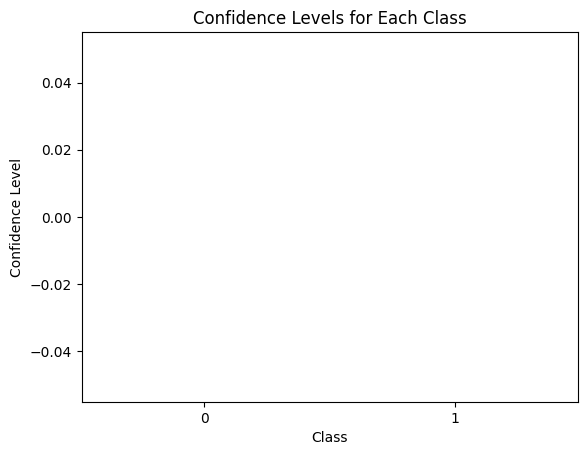

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data (replace with your audio features)
audio_features = np.array([[1, 2], [2, 3], [3, 4], [4, 5]])

# Create the SVM classifier
clf = svm.SVC(kernel='linear')

# Train the SVM classifier with the entire dataset
clf.fit(X, y)

# Calculate confidence levels for each class
confidence_levels = clf.decision_function(audio_features)

# Plotting the bar graph
classes = clf.classes_
x_pos = np.arange(len(classes))

plt.bar(x_pos, confidence_levels.mean(axis=0), alpha=0.5)
plt.xticks(x_pos, classes)
plt.xlabel('Class')
plt.ylabel('Confidence Level')
plt.title('Confidence Levels for Each Class')
plt.show()


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear')

In [ ]:
# Train the SVM classifier
svm_classifier.fit(X_train, y_train)


ValueError: ignored

In [ ]:
# Load the labels corresponding to the training and test audio files
train_labels = np.load('/content/sample_data/train.npy', allow_pickle=True)
test_labels = np.load('/content/sample_data/test.npy', allow_pickle=True)

UnpicklingError: ignored

In [ ]:
from scipy.io import wavfile

# Specify the path to your WAV file
audio_file = '/content/DRONE_001.wav'

# Load the WAV file
sample_rate, audio_data = wavfile.read(audio_file)

# Display the sample rate and duration of the audio
duration = len(audio_data) / sample_rate
print("Sample Rate:", sample_rate)
print("Duration:", duration, "seconds")


Sample Rate: 44100
Duration: 10.000022675736961 seconds


In [ ]:





# Extract MFCC features from training audio file
train_features = extract_mfcc(train_audio_file)

# Extract MFCC features from test audio file
test_features = extract_mfcc(test_audio_file)

# Scale the features for better performance
scaler = StandardScaler()
train_features_scaled = scaler.fit_transform(train_features)
test_features_scaled = scaler.transform(test_features)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_features_scaled, train_labels, test_size=0.2, random_state=42)

# Train a classifier (SVM in this case) using the MFCC features
classifier = SVC()
classifier.fit(X_train, y_train)

# Evaluate the classifier on the validation set
val_predictions = classifier.predict(X_val)
val_accuracy = accuracy_score(y_val, val_predictions)
print("Validation Accuracy:", val_accuracy)

# Evaluate the classifier on the test set
test_predictions = classifier.predict(test_features_scaled)
test_accuracy = accuracy_score(test_labels, test_predictions)
print("Test Accuracy:", test_accuracy)

# Plot the output
plt.figure(figsize=(8, 6))
plt.scatter(range(len(test_labels)), test_labels, marker='o', label='True Labels')
plt.scatter(range(len(test_predictions)), test_predictions, marker='x', label='Predicted Labels')
plt.xlabel('Sample Index')
plt.ylabel('Label')
plt.title('True Labels vs. Predicted Labels')
plt.legend()
plt.show()


In [ ]:
!pip install librosa soundfile

In [ ]:
import numpy as np
import librosa
import soundfile as sf

def peak_normalize(input_file, output_file, target_db=-3.0):
    # Load the audio file
    data, sample_rate = librosa.load(input_file, sr=None)

    # Convert the audio data to floating point values
    data = data.astype(np.float32)

    # Calculate the peak amplitude from the audio data
    peak_amplitude = np.max(np.abs(data))

    # Calculate the scaling factor to achieve the target dB level
    scale_factor = 10.0 ** ((target_db - 20 * np.log10(peak_amplitude)) / 20.0)

    # Apply the scaling factor to the audio data
    data_normalized = data * scale_factor

    # Write the normalized audio data to a new file
    sf.write(output_file, data_normalized, sample_rate)

# Usage example
input_file = '/content/DRONE_001.wav'
output_file = '/content/sample_data/peaknormalized1.wav'
target_db = -3.0

peak_normalize(input_file, output_file, target_db)


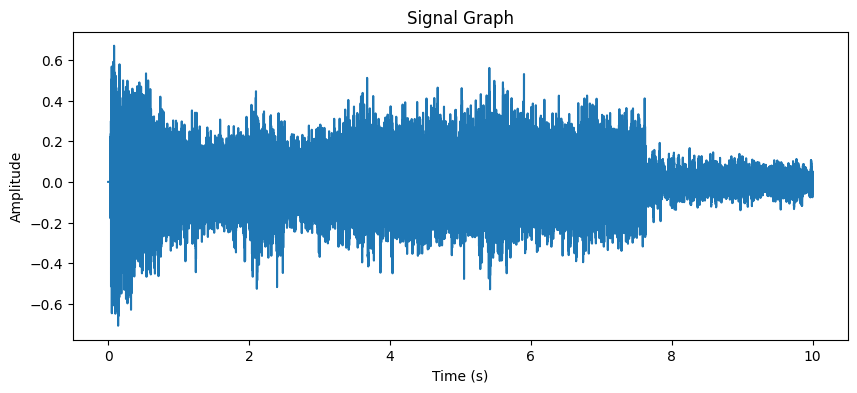

In [ ]:
import numpy as np
import librosa
import matplotlib.pyplot as plt

def plot_signal(input_file):
    # Load the audio file
    data, sample_rate = librosa.load(input_file, sr=None)

    # Generate the time axis for the signal
    duration = len(data) / sample_rate
    time = np.linspace(0., duration, len(data))

    # Plot the signal graph
    plt.figure(figsize=(10, 4))
    plt.plot(time, data)
    plt.title('Signal Graph')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

# Usage example
input_file = '/content/sample_data/peaknormalized1.wav'

plot_signal(input_file)


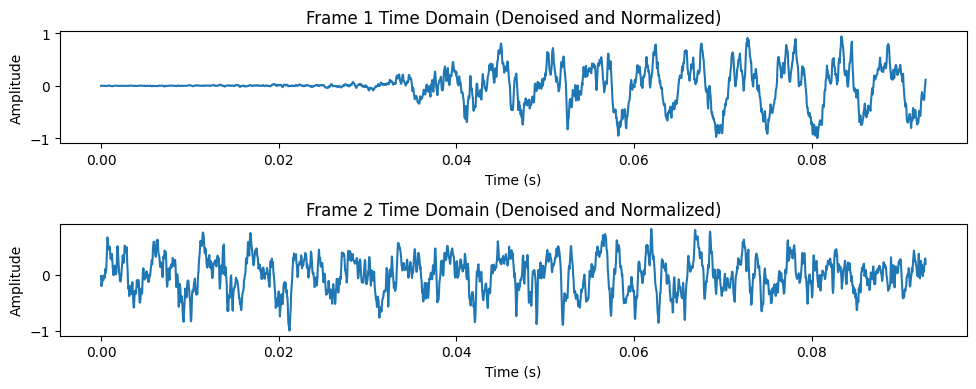

In [ ]:
# Perform peak normalization
frame_1_normalized = frame_1_denoised / np.abs(frame_1_denoised).max()
frame_2_normalized = frame_2_denoised / np.abs(frame_2_denoised).max()

# Plot the waveforms with peak normalization applied
plt.figure(figsize=(10, 4))

plt.subplot(2, 1, 1)
plt.plot(time_frame_1, frame_1_normalized)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Frame 1 Time Domain (Denoised and Normalized)')

plt.subplot(2, 1, 2)
plt.plot(time_frame_2, frame_2_normalized)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Frame 2 Time Domain (Denoised and Normalized)')

plt.tight_layout()
plt.show()
